# Imports

In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from scipy.ndimage import gaussian_filter, rotate, shift
import networkx as nx
import ndlib.models.opinions as op
import ndlib.models.ModelConfig as mc

In [45]:
n_jobs = 4 # Fit to CPU

# Functions

## Gaussian based

In [46]:
def generate_gaussian_blob(X, Y, size, x_center, y_center):
    # Generate blob
    blob = np.zeros((X, Y), dtype=float)
    blob[x_center, y_center] = 1
    sigma_x = np.sqrt(size) / random.randint(1, 10) # Check gaussian / other constants distribution for denominator
    sigma_y = np.sqrt(size) / random.randint(10, 20) # Check gaussian / other constants distribution for denominator
    blob = gaussian_filter(blob, sigma=[sigma_x, sigma_y])
    
    # Rotate blob
    angle = np.clip(np.random.normal(loc=0, scale=30), -90, 90) # Test for optimal generation constants
    blob = rotate(blob, angle, reshape=False)
    blob = blob > blob.mean()
    
    # Random shift of the blob
    x_shift = np.random.randint(0, X) - x_center # Test for optimal generation constants
    y_shift = np.random.randint(0, Y) - y_center # Test for optimal generation constants
    blob_final = shift(blob, shift=[x_shift, y_shift])
    return blob_final

In [55]:
def generate_gaussian_matrix(X, Y, num_clusters, avg_cluster_size, min_cluster_size, max_cluster_size):
    cluster_sizes = np.random.randint(min_cluster_size, max_cluster_size, num_clusters) # Check gaussian distribution sizes generation
    blobs = Parallel(n_jobs=n_jobs)(
        delayed(generate_gaussian_blob)(X, Y, size, x_center=X//2, y_center=Y//2) for size in cluster_sizes
    )
    return ~np.logical_or.reduce(blobs)

## Voter model based

In [48]:
def generate_voter_model_matrix(X, Y, iterations):
    G = nx.grid_2d_graph(X, Y)
    voter_model = op.VoterModel(G)
    
    # Set custom initial opinions
    initial_opinions = {node: np.random.choice([0, 1]) for node in G.nodes()} # Check non-uniform distributions
    model.status = initial_opinions
    model.iteration_bunch(iterations) # Check for preferring vertical movements
    final_opinions = np.array([model.status[node] for node in G.nodes()]).reshape(X, Y)
    return final_opinions

## Image plotting

In [49]:
def plot_boolean_iris(matrix, title=''):
    plt.imshow(matrix, cmap='gray')
    plt.title(title)
    plt.show()

In [69]:
# Voter Model Constants
X, Y = 50, 250
iterations = 50000

In [70]:
voter_model_iris = generate_voter_model_matrix(X, Y, iterations)

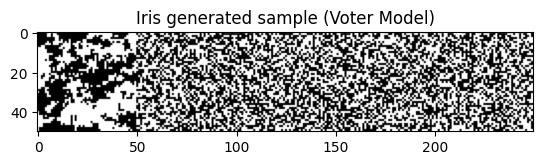

In [71]:
plot_boolean_iris(voter_model_iris, title='Iris generated sample (Voter Model)')

In [63]:
# Gaussian Constants
X, Y = 100, 500
num_clusters = 120 
avg_cluster_size = 100
min_cluster_size = 10
max_cluster_size = 1000

In [64]:
gaussian_iris = generate_gaussian_matrix(X, Y, num_clusters, avg_cluster_size, min_cluster_size, max_cluster_size)

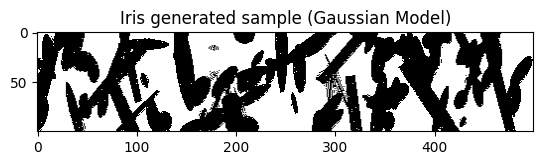

In [65]:
plot_boolean_iris(gaussian_iris, title='Iris generated sample (Gaussian Model)')

## Iris wrapping implementation